## Chemical reaction networks simulator
#### Dr Martin Peeks 2019 (updated 2024)

### Quick intro to Jupyter
This is a Jupyter notebook. It allows you to interactively run code (in this case, Python 3) and allows us to interleave code with text. There are two types of cells: 'code' and 'markdown', for code and text respectively. The menus at the top of the page are fairly self-explanatory, but the most important things for you to know are:

Ctrl-Enter runs the current cell
Shift-Enter runs the current cell and moves to the next.

### Quick intro to Python
Python is an easy-to-use programming language which can be  heavily extended by a huge range of installable packages. If you want to learn python, codeacademy is a good start (though there are many options!). In this demo we make exhaustive use of the symfit package to allow us to define symbolic expressions (e.g. for rate expressions) and then simulate them. This way, we don't need to think too much about converting mathematical representations of rates into something Python can understand - symfit ('symbolic fitting') does it all for us!

In the code below, some lines start with '#' and are a different colour. These are comments, and are intended to guide someone who wants to read the code. 

### Navigating this model
The first *code* cell in this model is used to:
 * import python modules which we will use later 
 * load the methods for some models, written specifically for this course. You can take a look at the underlying code on github, here: https://github.com/martinp23/teaching-related
 
When you start the notebook, it is essential for you to run this cell (Ctrl-Enter) to make sure the necessary methods are loaded. After this code block, you come to more blocks with interleaved explanation which allow you to run some simulations.


### Defaults
 * Rate: 1e-2 M<sup>-1</sup>s<sup>-1</sup>
 * Start concentration: 50 mM for starting materials, 0 mM for products
 
### Enhancement

In some examples below, we increase a rate constant and look at the effect on the final product distribution. Here we call this the 'enhancement', and it can be positive or negative. The enhancement tells us how much more (or less) product we have compared to the case where all rate constants are equal:

$$\text{Enhancement} = 100 \times \frac{[XY]_\text{after change} -  [XY]_\text{all rates equal}}{[XY]_\text{all rates equal}} $$

In [1]:
# Ctrl-Enter on this cell to load modules
import symfit
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, Parameter, Variable, variables, Fit, ODEModel, D

from networkmodels import oneProductModel,twoProductModel,square,box
from generalmodel import generalModel

c:\Users\mpeeks\miniforge3\envs\general-fitting\Lib\site-packages\symfit\core\printing.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
#some defaults defined here. run this cell

conc0 = 50e-3 # conc = 50 mM
tvec = np.linspace(0, 200000, 100) # times from 0 s to 2e5 sec, with 100 intervals/timepoints. 
                                # We go all the way to 2e5 sec to ensure we're at equilibrium!
# all default rates are 1e-2 M-1 s-1. To change a rate, just change the argument below



### Example 1: a simple chemical reaction

The first example is for a simple chemical reaction: A and B react to give AB. This reaction is depicted as shown in the image below: starting materials are nodes (A and B), and the reaction to give AB is denoted by an edge (line).

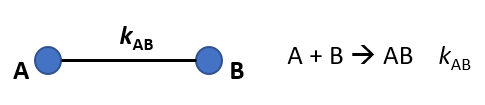

We can see that changing the rate constant from the default (1e-2 M<sup>-1</sup>s<sup>-1</sup> to 1 M<sup>-1</sup>s<sup>-1</sup>) dramatically changes the concentration vs time profile. If an error/warning appears here, just ignore it so long as you still get the graphs.

You can change the rate constants in the cell below and re-run it (Ctrl+Enter) to see the effect on the results. You can also change the time resolution - look at the code cell for details. Initially we run the reaction all the way to 20000 seconds, just so that we can be sure our final concentration profile is at (or near) equilibrium.

c:\Users\mpeeks\miniforge3\envs\general-fitting\Lib\site-packages\symfit\core\fit_results.py:279: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - SS_res/SS_tot


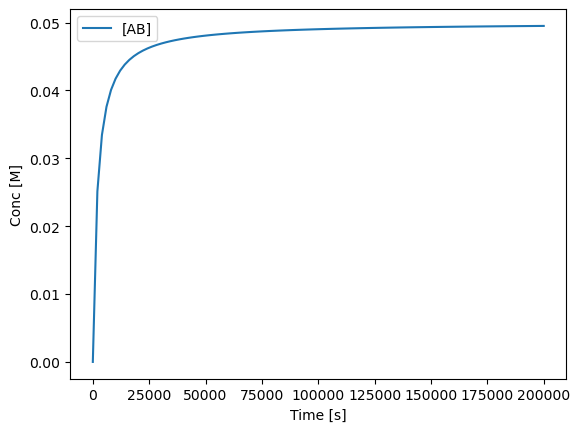

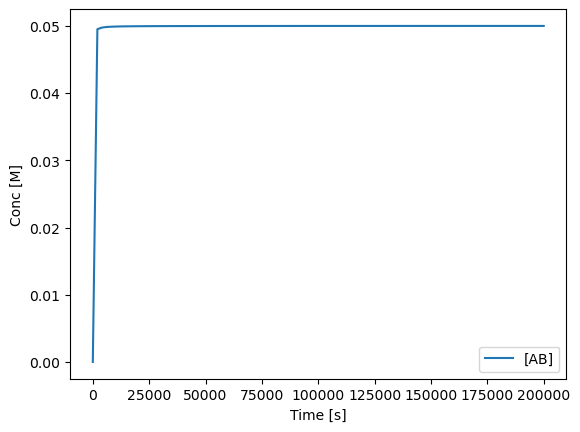

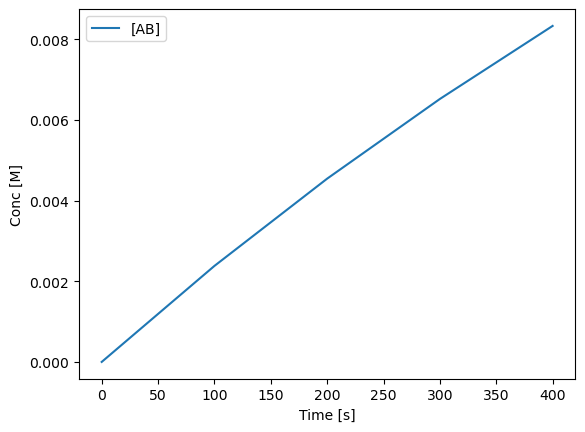

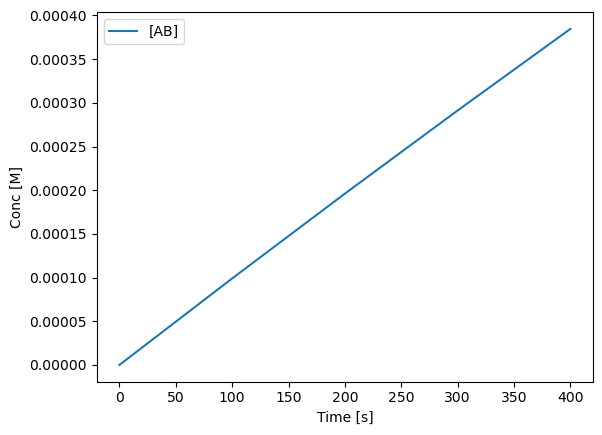

In [3]:
oneProductModel()
oneProductModel(kABval=1)

# here we make a new vector of times: 0 to 500 with 100 increments:
times = np.arange(0,500,100)

# we can then pass this new time base to our model
oneProductModel(tvec=times)

# we can also change the start concentration (default is 50 mM, here we're doing 10 mM. Note that the reaction is slower!)
oneProductModel(tvec=times,conc0=1e-2)


### Example two: two reactions, one shared starting material

In this model we have two reactions making AB and BC, as depicted on the diagram below. 

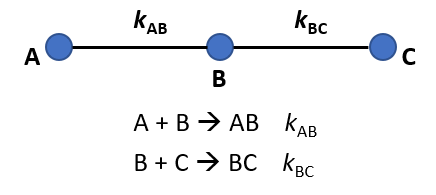

The model gives us the concentrations of AB and BC. Initially we see that the concentrations of both species are equal at equilibrium (see the bar chart).

But what happens if we increase the rate of formation of AB? We do that in the second cell, below, and can see a new graph showing the enhancement of \[AB\] vs \[BC\]. Since we've increased the rate of formation of \[AB\], it's no surprise that we have more at equilibrium. Is the effect on \[BC\] what you expected?

Basic model 2


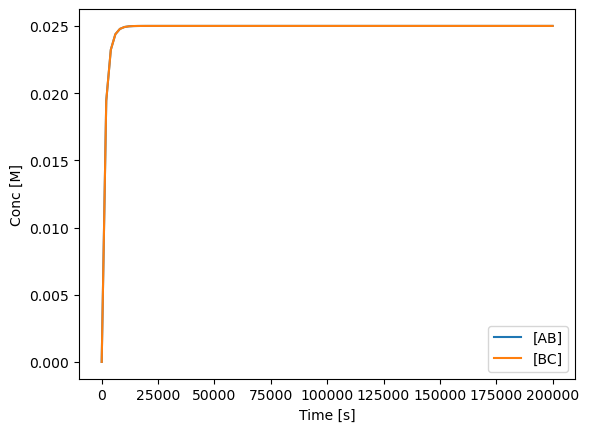

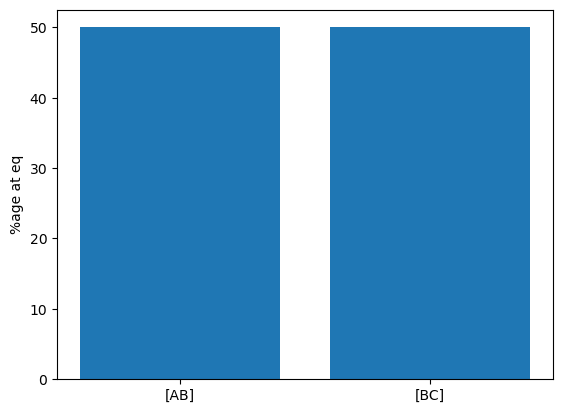

No enhancement compared to equal rates


In [4]:
print('Basic model 2')
twoProductModel()

Increase kAB by a factor of 10


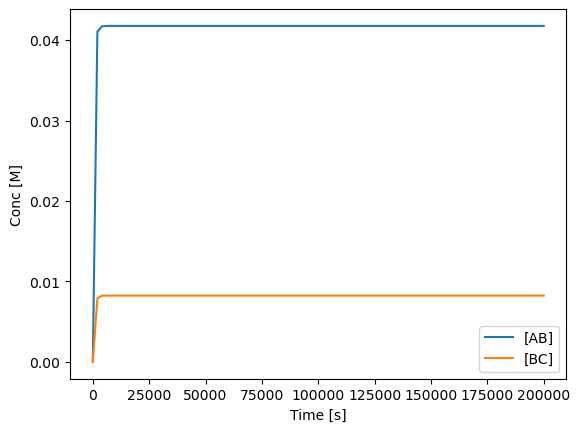

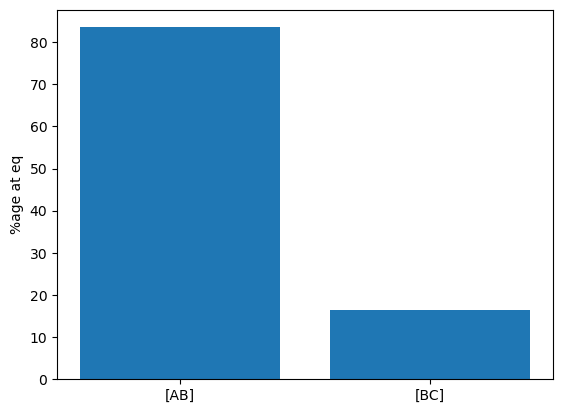

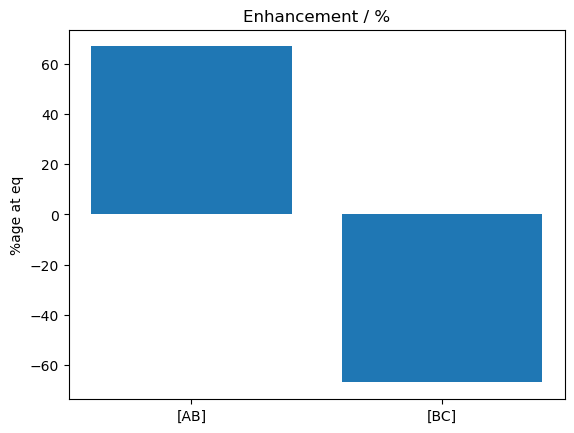

In [5]:
print('Increase kAB by a factor of 10')
twoProductModel(kABval=1e-1)

### Model 3: a box

Now that we know what we're looking at in the plots, let's see what happens when we made a more interesting network topology. This is an open box: we arrange our four starting materials in a square, and connect each to two others. So our possible products are: AB, AC, BD, CD.

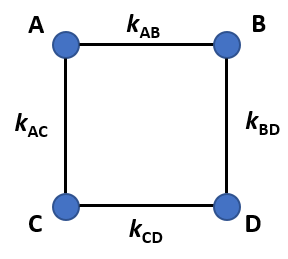

In the first cell below, we can see that when all rates are equal, all of the products are obtained in equal proportions. 

But what happens if we increase the rate of formation of AB by a factor of 10? What will happen, do you think, to the other reaction rates? Think critically, and note down your ideas, then run the second cell below. Is the result what you expected? If not, can you understand why?

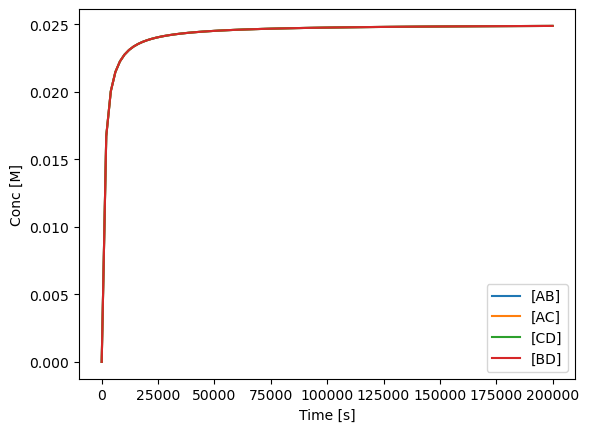

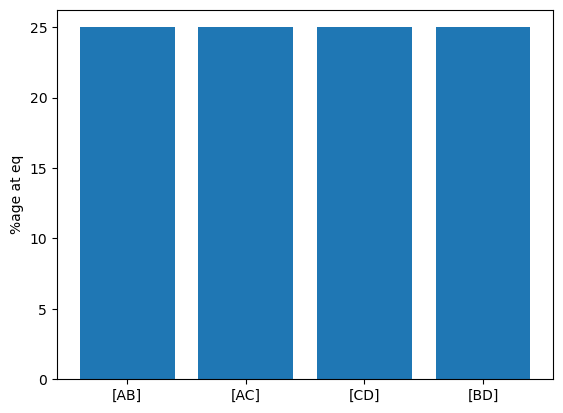

No enhancement compared to equal rates


In [6]:
box()

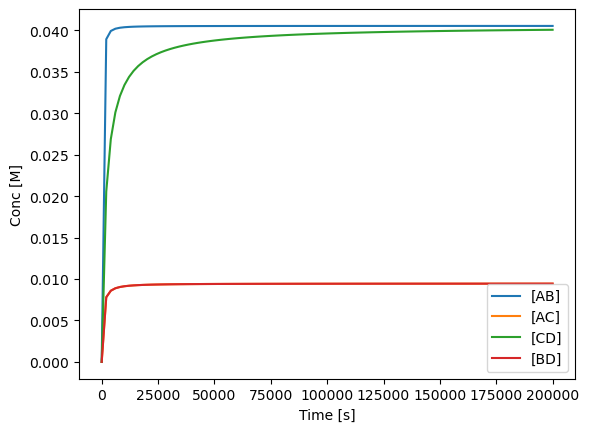

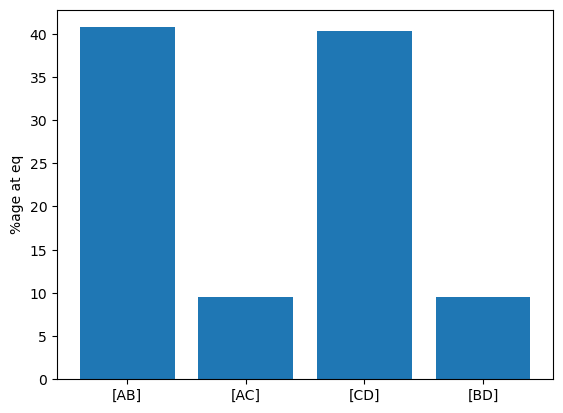

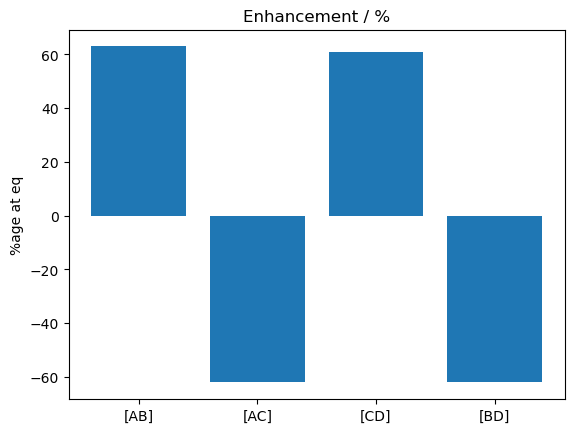

In [7]:
box(kABval=1e-1)

### Model 4: a fully connected square

Now that you're getting the hang of this, we can make our network from above even more complex. What if we connect the diagonal nodes, making AD and BC? By now you have probably realised that when all of the rates are equal, you get an equal product distribution (first cell below). But what if, again, we increase *k*<sub>AB</sub> by a factor of 10? Which other species do you expect to be upregulated and downregulated?

Why a factor of 10? No reason - it really doesn't matter and you should play around with these models to explore different start concentrations and rate constants!

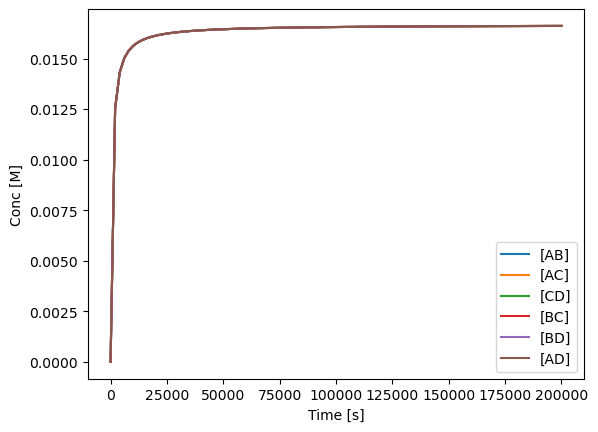

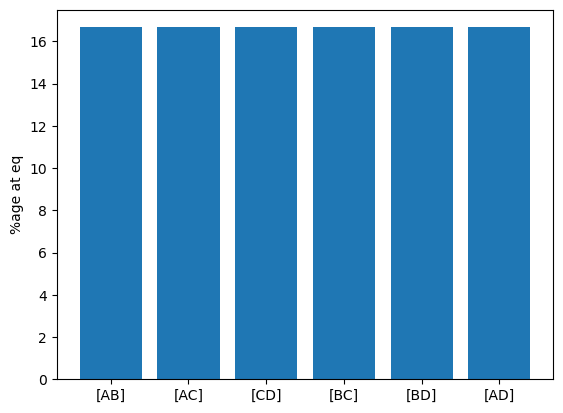

No enhancement compared to equal rates


In [8]:
square()

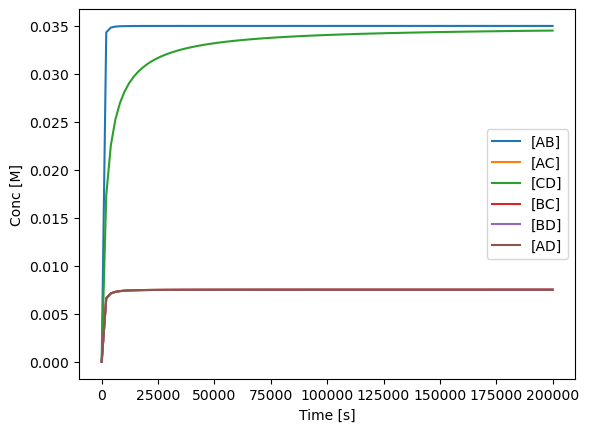

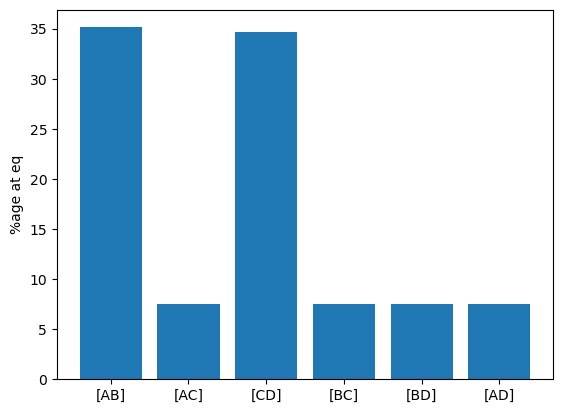

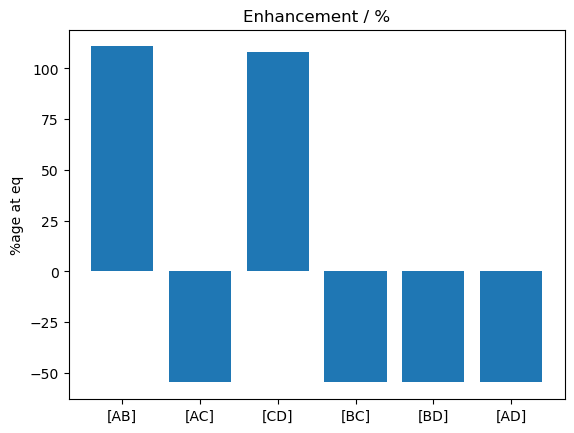

In [9]:
square(kABval=0.1)

#### The next level: a general model

### Unfortunately the code below does not currently work - ignore this section.


In the cell below, you can make any sort of network you want!

First, the network is described by a weighted adjcency matrix. This is simply a square matrix (n x n). 

The example below shows the 'box' model from above (example 3). The adjacency matrix has dimensions 4x4. 

You can imagine that the rows are labelled A-D and the columns are labelled A-D also. Each element contains the rate constant for formation of the product of the row-reactant and the column-reactant. So row 1, column 2, corresponds to AB. Row 1, column 4, corresponds to AD. All of the rate constants are 1e-2, except for products which aren't made (AA, BB, AC, etc). Note that the matrix is symmetric: AB is the same as BA. 

After defining our matrix as below, we can then run the model using the same sort of conditions as before. 

Note that the 'enhancement' is calculated relative to the corresponding fully-connected matrix. In the example below, that's the 'square' model (Example 4).  If you want to try the approach of just changing one rate constant and seeing the effect on the product distribution, you should write down the product ratios (e.g. 25:25:25:25) before and after and calculate the ehancement yourself. 

Hopefully you can see that you can construct any sort of network topology using this adjacency matrix. At some point, the matrix will become too computationally expensive. Later on we'll try constructing a six-membered network where each species only connects to two others: the topology would be that of a hexagon (or benzene!).

{kAB: np.float64(0.01), kAC: np.float64(0.0), kAD: np.float64(0.01), kBC: np.float64(0.01), kBD: np.float64(0.0), kCD: np.float64(0.01)}
Derivative(A, t; kAB, kAC, kAD, kBC, kBD, kCD) = -kAB*A*B - kAC*A*C - kAD*A*D
Derivative(AB, t; kAB, kAC, kAD, kBC, kBD, kCD) = kAB*A*B
Derivative(AC, t; kAB, kAC, kAD, kBC, kBD, kCD) = kAC*A*C
Derivative(AD, t; kAB, kAC, kAD, kBC, kBD, kCD) = kAD*A*D
Derivative(B, t; kAB, kAC, kAD, kBC, kBD, kCD) = -kAB*A*B - kBC*B*C - kBD*B*D
Derivative(BC, t; kAB, kAC, kAD, kBC, kBD, kCD) = kBC*B*C
Derivative(BD, t; kAB, kAC, kAD, kBC, kBD, kCD) = kBD*B*D
Derivative(C, t; kAB, kAC, kAD, kBC, kBD, kCD) = -kAC*A*C - kBC*B*C - kCD*C*D
Derivative(CD, t; kAB, kAC, kAD, kBC, kBD, kCD) = kCD*C*D
Derivative(D, t; kAB, kAC, kAD, kBC, kBD, kCD) = -kAD*A*D - kBD*B*D - kCD*C*D


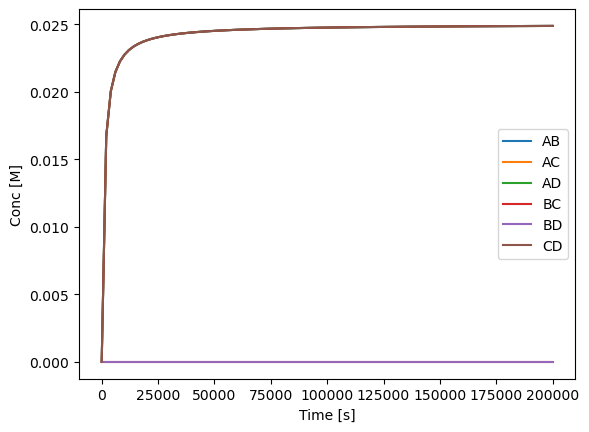

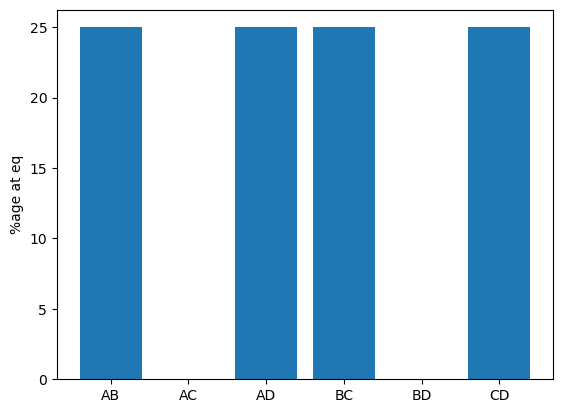

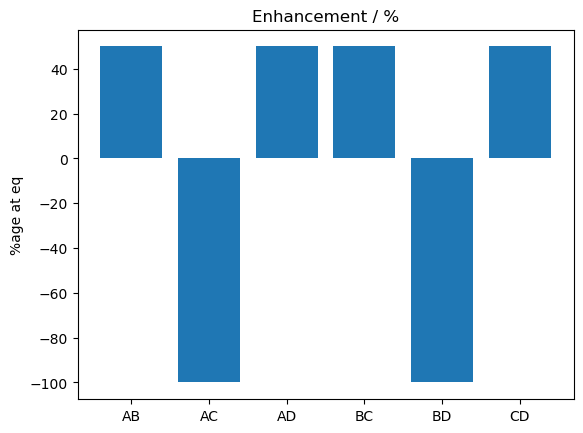

In [ ]:
rates = np.array([[ 0,    1e-2, 0,    1e-2 ],
                  [ 1e-2, 0,    1e-2, 0    ],
                  [ 0,    1e-2, 0,    1e-2 ],
                  [ 1e-2, 0,    1e-2, 0    ]])

initconc = 50e-3
tvec=np.linspace(0, 200000, 100)
generalModel(rates, initconc, tvec)

It's actually implicit that the matrix is upper triangular. In other words, you only need to fill in values in the upper right triangle of the matrix. That means it's a bit easier to make the 6-membered matrix if we bear this in mind and just leave the lower triangular values as zero:

{kAB: np.float64(0.01), kAC: np.float64(0.0), kAD: np.float64(0.0), kAE: np.float64(0.0), kAF: np.float64(0.01), kBC: np.float64(0.01), kBD: np.float64(0.0), kBE: np.float64(0.0), kBF: np.float64(0.0), kCD: np.float64(0.01), kCE: np.float64(0.0), kCF: np.float64(0.0), kDE: np.float64(0.01), kDF: np.float64(0.0), kEF: np.float64(0.01)}
Derivative(A, t; kAB, kAC, kAD, kAE, kAF, kBC, kBD, kBE, kBF, kCD, kCE, kCF, kDE, kDF, kEF) = -kAB*A*B - kAC*A*C - kAD*A*D - kAE*A*E - kAF*A*F
Derivative(AB, t; kAB, kAC, kAD, kAE, kAF, kBC, kBD, kBE, kBF, kCD, kCE, kCF, kDE, kDF, kEF) = kAB*A*B
Derivative(AC, t; kAB, kAC, kAD, kAE, kAF, kBC, kBD, kBE, kBF, kCD, kCE, kCF, kDE, kDF, kEF) = kAC*A*C
Derivative(AD, t; kAB, kAC, kAD, kAE, kAF, kBC, kBD, kBE, kBF, kCD, kCE, kCF, kDE, kDF, kEF) = kAD*A*D
Derivative(AE, t; kAB, kAC, kAD, kAE, kAF, kBC, kBD, kBE, kBF, kCD, kCE, kCF, kDE, kDF, kEF) = kAE*A*E
Derivative(AF, t; kAB, kAC, kAD, kAE, kAF, kBC, kBD, kBE, kBF, kCD, kCE, kCF, kDE, kDF, kEF) = kAF*A*F
Deriv

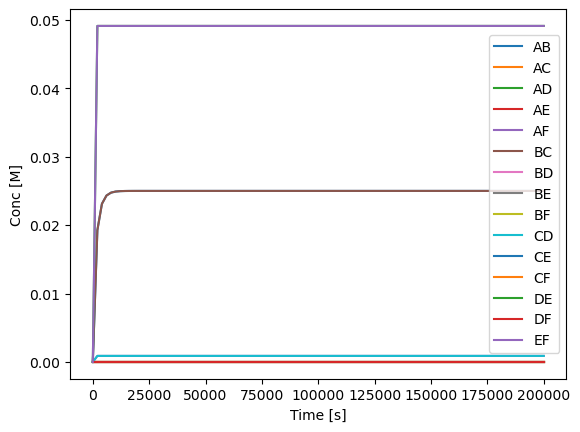

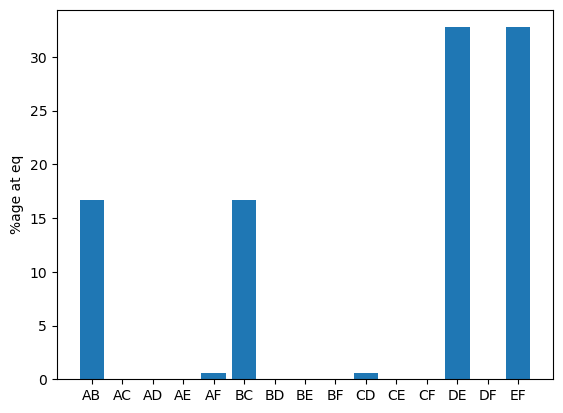

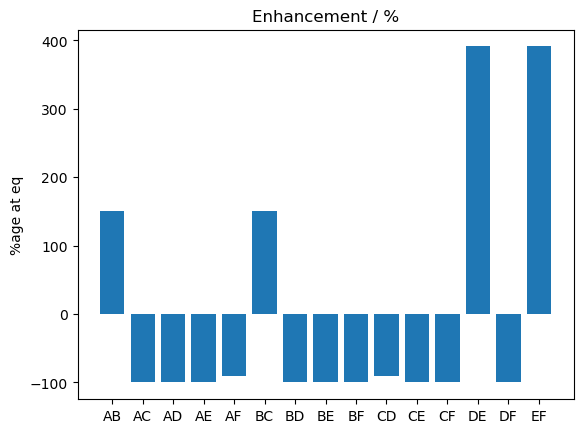

In [3]:
rates = np.array([[ 0,    1e-2, 0,    0,   0,   1e-2 ],
                  [ 0,    0,    1e-2, 0,   0,   0    ],
                  [ 0,    0,    0,    1e-2,0,   0    ],
                  [ 0,    0,    0,    0,   1e-2,0    ],
                  [ 0,    0,    0,    0,   0,   1e-2 ],
                  [ 0,    0,    0,    0,   0,   0    ]])

initconc = 50e-3
tvec=np.linspace(0, 200000, 100)
generalModel(rates, initconc, tvec)

Try adding more connections to this network and see what happens to the product distributions, even when all rates are equal. Also try changing rates.